In [ ]:
# Librerias
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from joblib import dump

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Para modelado
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

# Para evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Ruta al archivo CSV con datos de propiedades colombianas
ruta_base = r"C:\Users\Soportedrai\Documents\habidata\data"

# Opción B: Duplicar las barras invertidas (\\)
# ruta_base = "C:\\Users\\Soportedrai\\Documents\\habidata\\data"

# 2. Especifica el nombre completo del archivo CSV
#nombre_archivo = "properties_final.csv"
nombre_archivo = "properties_final_2.csv"

# 3. Combina la ruta base y el nombre del archivo para la ruta completa
archivo_csv_completo = os.path.join(ruta_base, nombre_archivo)

# Cargar dataset completo
data = pd.read_csv(archivo_csv_completo)
data.head()


,ad_type,start_date,end_date,created_on,lat,lon,price,title,description,property_type,operation_type,surface_total_final,bedrooms_final,bathrooms_final,l3_final,l4_final
0,Propiedad,2020-10-07,2021-05-01,2020-10-07,6.297802,-75.577835,327422000.0,Venta de casa en Florencia,Venta de Casa en Florencia Medellin\n\nLa casa...,Casa,Venta,192.00,5.0,2.0,Medellín,Doce de Octubre
1,Propiedad,2020-10-07,2021-07-23,2020-10-07,6.355670,-75.494249,464728000.0,Venta casa Copacabana Antioquia,Venta casa Copacabana para construir Medellin...,Casa,Venta,260.36,5.0,1.0,Copacabana,Jardines
2,Propiedad,2020-10-07,2020-10-30,2020-10-07,6.307757,-75.560560,181666400.0,Vendo casa en las Brisas 3er piso remodelada p...,Barrio las Brisas Medellín Antioquia\nCasa ter...,Casa,Venta,72.00,3.0,1.0,Medellín,Castilla
3,Propiedad,2020-10-07,2020-11-26,2020-10-07,6.317227,-75.563295,253488000.0,Vendo casa 1er piso garage en cabañas terminada,Barrio cabañas\nCasa en edificio primer piso\n...,Casa,Venta,94.00,3.0,2.0,Bello,Cabañas
4,Propiedad,2020-10-07,2020-11-26,2020-10-07,6.317227,-75.563295,253488000.0,Vendo casa 1er piso garage en cabañas terminada,Barrio cabañas\nCasa en edificio primer piso\n...,Casa,Venta,94.00,3.0,2.0,Bello,Cabañas



Primeras filas del Dataframe

Cantidad de filas y columnas:

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21192 entries, 0 to 21191
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_type              21192 non-null  object 
 1   start_date           21192 non-null  object 
 2   end_date             21192 non-null  object 
 3   created_on           21192 non-null  object 
 4   lat                  16543 non-null  float64
 5   lon                  16543 non-null  float64
 6   price                21192 non-null  float64
 7   title                21192 non-null  object 
 8   description          21192 non-null  object 
 9   property_type        21192 non-null  object 
 10  operation_type       21192 non-null  object 
 11  surface_total_final  21192 non-null  float64
 12  bedrooms_final       21192 non-null  float64
 13  bathrooms_final      21192 non-null  float64
 1

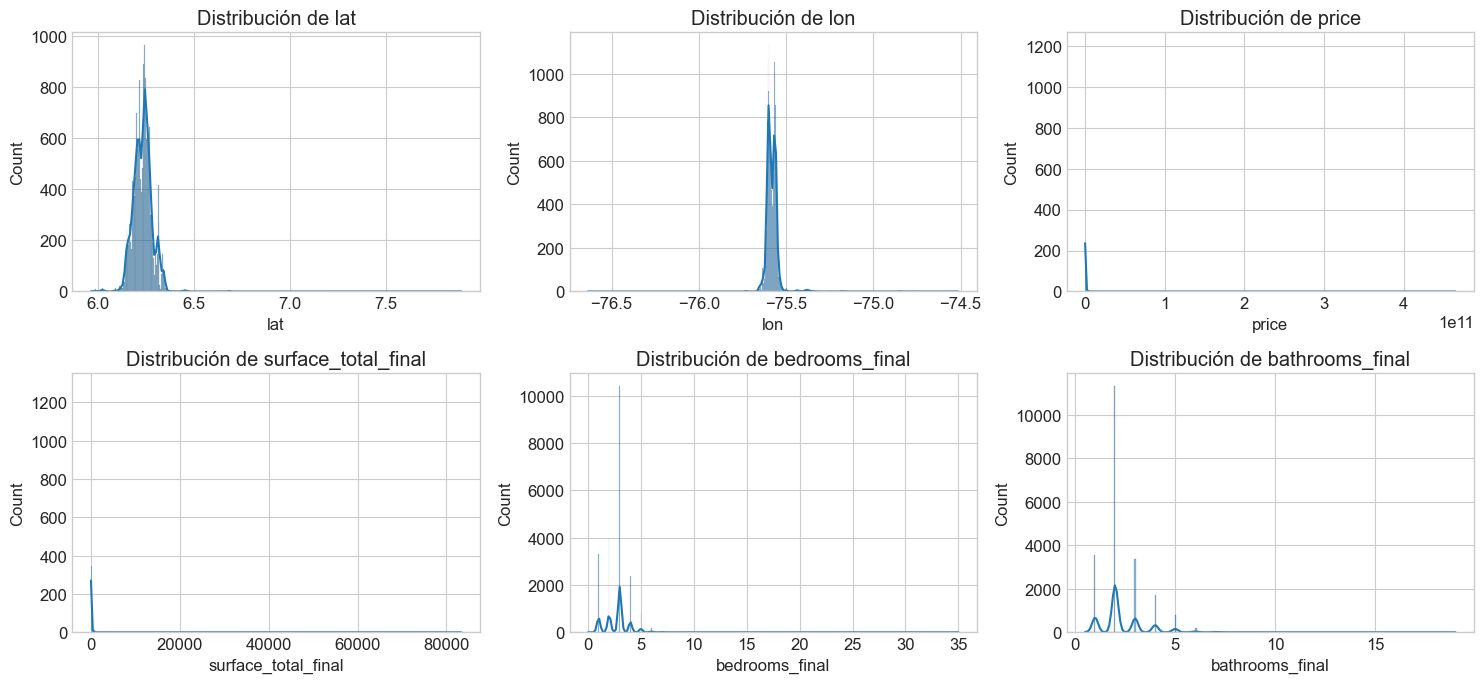


Detección de outliers en variables numéricas:


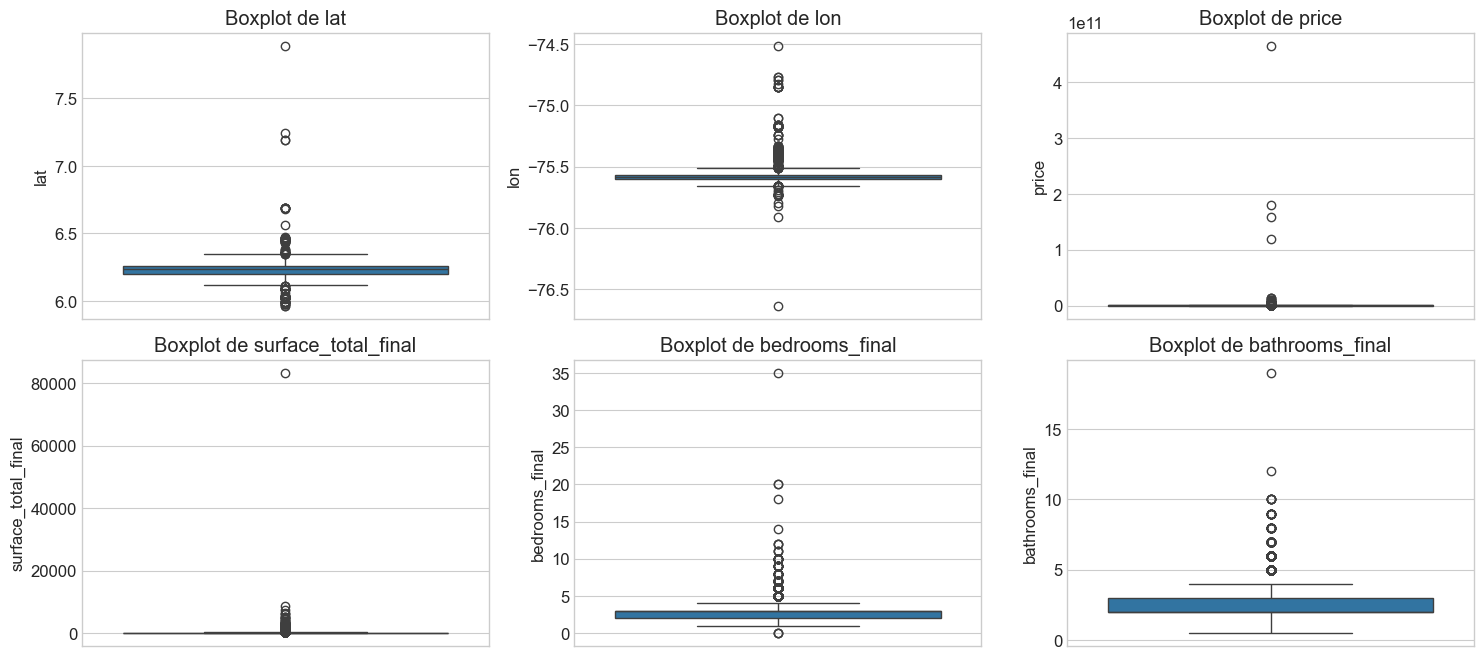


Matriz de correlación entre variables numéricas:


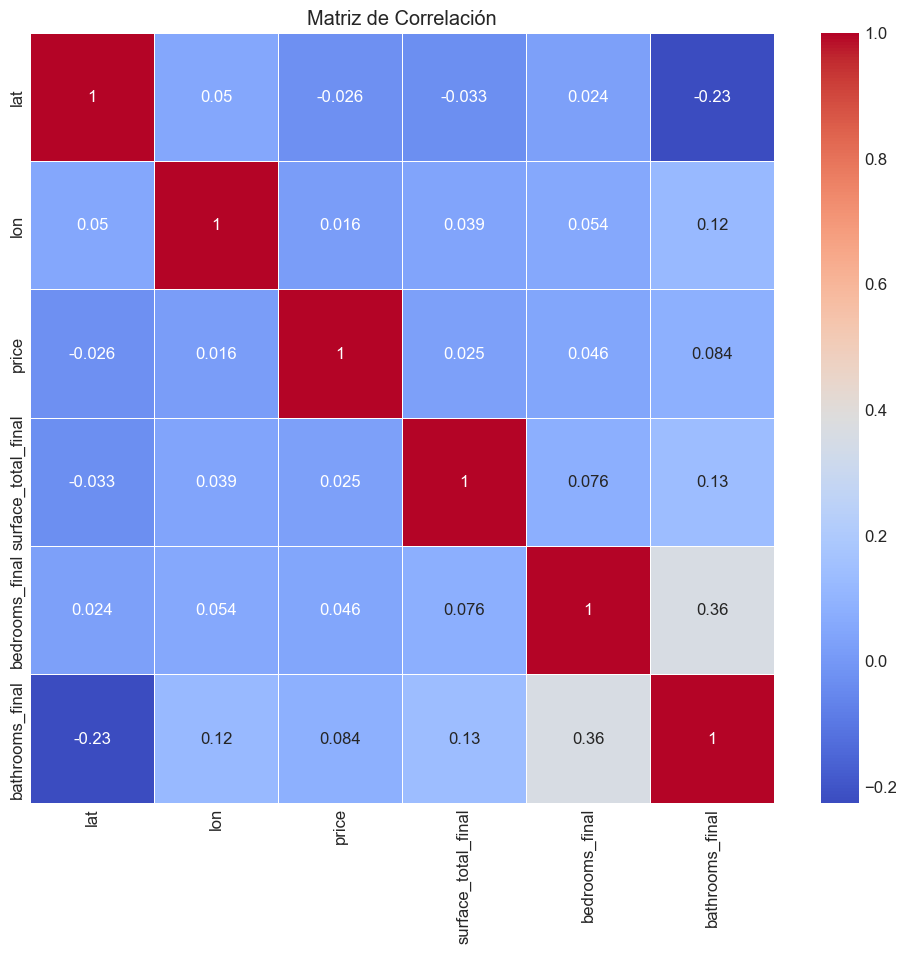

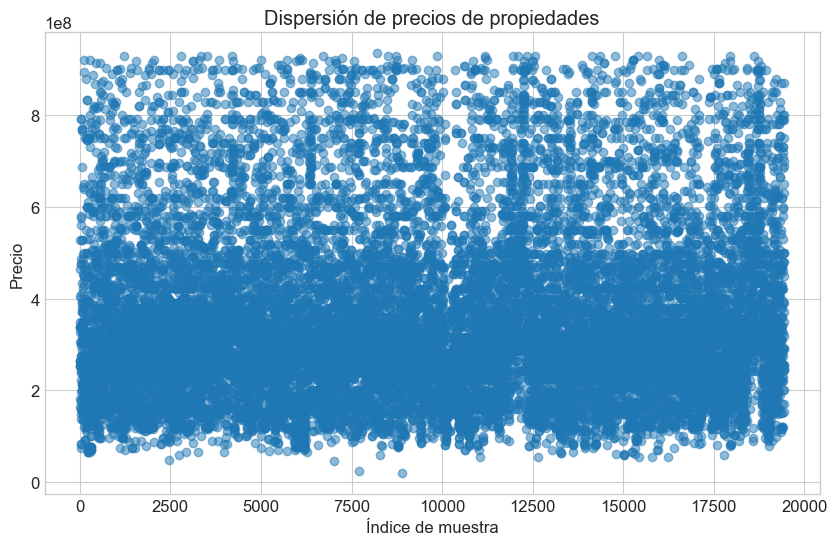

Tamaño del conjunto de entrenamiento: 15561 muestras
Tamaño del conjunto de prueba: 3891 muestras
Forma de X_train después del preprocesamiento: (15561, 94)
                           R2_mean      MAE_mean     RMSE_mean
Random Forest             0.831159  4.669226e+07  7.716578e+07
Decision Tree             0.778092  4.875974e+07  8.849827e+07
Gradient Boosting         0.773877  6.473912e+07  8.931091e+07
Support Vector Regressor -0.059152  1.432813e+08  1.933674e+08
Linear Regression        -9.090923  8.691941e+07  3.557545e+08

Generando gráficos de resultados de CV...


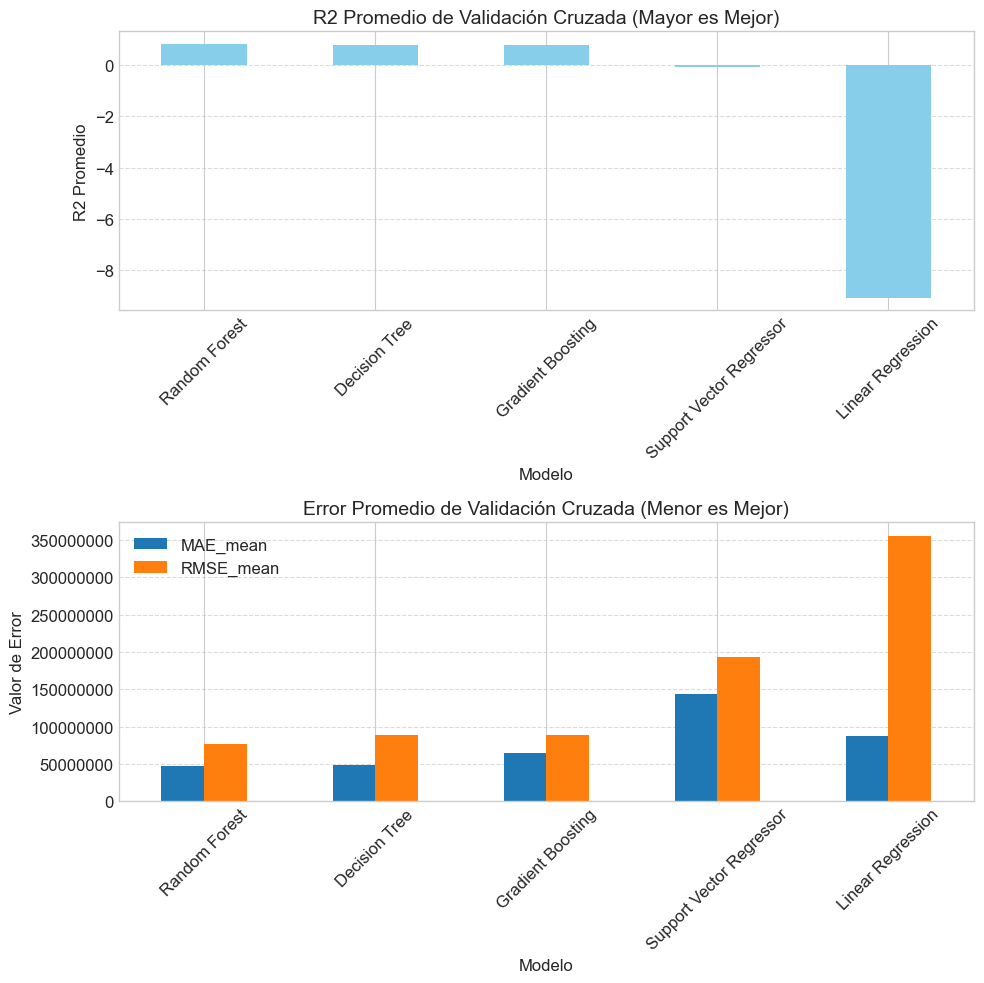

R2: 0.8554605480467186
MAE: 43006720.017020494
RMSE: 5092465193057779.0


In [25]:
"""#Entendimiento de los datos"""

# Mostrar las primeras filas del Dataframe
print("\nPrimeras filas del Dataframe")
data.head()

# Mostrar cantidad de filas y columnas
print("\nCantidad de filas y columnas:")
data.shape

# Obtener información general del DataFrame
print("\nInformación del DataFrame:")
data.info()

# Descripción estadística de los datos numéricos
print("\nDescripción Estadística:")
data.describe()

# Verificar valores nulos
print("\nValores nulos por columna:")
data.isnull().sum()

# Verificar tipos de datos
print("\nTipos de datos:")
data.dtypes

"""#Visualización Exploratoria"""

# Función para determinar columnas numéricas y categóricas
def identificar_tipos_columnas(dataframe):
    numericas = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categoricas = dataframe.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    return numericas, categoricas

columnas_numericas, columnas_categoricas = identificar_tipos_columnas(df)

# Distribución de variables numéricas
print("\nDistribución de variables numéricas:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnas_numericas[:min(len(columnas_numericas), 9)]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers (valores atípicos)
print("\nDetección de outliers en variables numéricas:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnas_numericas[:min(len(columnas_numericas), 9)]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

# Matriz de correlación
print("\nMatriz de correlación entre variables numéricas:")
plt.figure(figsize=(12, 10))
correlation_matrix = df[columnas_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

"""#Eliminación de outliers de precio"""

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos dentro de 1.5*IQR del rango intercuartílico
data = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]

# Gráfico de dispersión de precios",
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data['price'], alpha=0.5)
plt.title('Dispersión de precios de propiedades')
plt.xlabel('Índice de muestra')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Seleccionar características relevantes
features = ['created_on', 'surface_total_final', 'bedrooms_final', 'bathrooms_final', 'l3_final', 'l4_final']
X = data[features]
y = data['price']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# Identificar tipos de columnas
numeric_features = ['surface_total_final', 'bedrooms_final', 'bathrooms_final']
categorical_features = ['l3_final', 'l4_final']

# Crear transformadores para diferentes tipos de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Verificar la forma de los datos después del preprocesamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
print(f"Forma de X_train después del preprocesamiento: {X_train_preprocessed.shape}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

"""#Validación cruzada, comparación y resultados"""

results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    scores = cross_validate(pipeline, X_train, y_train,
                            cv=5,
                            scoring=('r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'),
                            return_train_score=True)
    results[name] = {
        'R2_mean': np.mean(scores['test_r2']),
        'MAE_mean': -np.mean(scores['test_neg_mean_absolute_error']),
        'RMSE_mean': -np.mean(scores['test_neg_root_mean_squared_error'])
    }

cv_results = pd.DataFrame(results).T.sort_values(by='R2_mean', ascending=False)
print(cv_results)

print("\nGenerando gráficos de resultados de CV...")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5) # Aumentar espacio entre subgráficos

# Gráfico 1: R2_mean (Mayor es mejor)
cv_results['R2_mean'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('R2 Promedio de Validación Cruzada (Mayor es Mejor)', fontsize=14)
axes[0].set_ylabel('R2 Promedio')
axes[0].set_xlabel('Modelo')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: MAE_mean y RMSE_mean (Menor es mejor)
cv_results[['MAE_mean', 'RMSE_mean']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Error Promedio de Validación Cruzada (Menor es Mejor)', fontsize=14)
axes[1].set_ylabel('Valor de Error')
axes[1].set_xlabel('Modelo')

# Usamos formato simple para las etiquetas del eje Y para evitar notación científica grande
axes[1].ticklabel_format(style='plain', axis='y') 
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


"""#Entrenar modelo final y evaluar en test con el mejor modelo que fue RandomForestRegressor:"""

best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(random_state=42))])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

"""#Búsqueda de hiperparámetros con GridSearchCV"""

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    Pipeline(steps=[('preprocessor', preprocessor),
                    ('model', RandomForestRegressor(random_state=42))]),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor score (R2):", grid.best_score_)

"""#Evaluar el modelo optimizado"""

best_rf = grid.best_estimator_
y_pred_test = best_rf.predict(X_test)

print("R2 (test):", r2_score(y_test, y_pred_test))
print("MAE (test):", mean_absolute_error(y_test, y_pred_test))
print("RMSE (test):", mean_squared_error(y_test, y_pred_test))



Mejores hiperparámetros: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Mejor score (R2): 0.8374721787320007
R2 (test): 0.8570893938285182
MAE (test): 41343621.01690561
RMSE (test): 4890166371034845.0


In [23]:
# Importaciones necesarias si ejecutas esto en un nuevo script
import pandas as pd
import numpy as np
# Asume que 'best_rf' y el 'preprocessor' están definidos por el código anterior.

def predecir_precio_vivienda(superficie, dormitorios, banos, localidad_l3, localidad_l4, modelo_optimizado):
    """
    Realiza una predicción del precio de la vivienda usando el modelo Random Forest optimizado.
    
    Args:
        superficie (float): surface_total_final
        dormitorios (int): bedrooms_final
        banos (int): bathrooms_final
        localidad_l3 (str): l3_final (Ej: "Palermo")
        localidad_l4 (str): l4_final (Ej: "Palermo Chico")
        modelo_optimizado (Pipeline): El mejor modelo (best_rf) obtenido de GridSearchCV.
    
    Returns:
        float: El precio predicho de la vivienda.
    """
    # 1. Crear un DataFrame con la estructura de las variables de entrada
    # Las columnas deben coincidir con 'features' usadas para entrenar el modelo:
    # ['surface_total_final', 'bedrooms_final', 'bathrooms_final', 'l3_final', 'l4_final']
    
    # Nota: La columna 'created_on' fue usada en X, pero la excluiremos si no es relevante
    # o no la pedimos al usuario (ya que era un factor de tiempo que probablemente no fue usado
    # si se excluyó del preprocesamiento numérico/categórico). 
    # Usaremos solo las 5 que definiste como features relevantes:
    
    data_input = pd.DataFrame({
        'surface_total_final': [superficie],
        'bedrooms_final': [dormitorios],
        'bathrooms_final': [banos],
        'l3_final': [localidad_l3],
        'l4_final': [localidad_l4],
        # Usamos una fecha genérica o la fecha actual para 'created_on' si es requerida por X
        # Si 'created_on' no fue usada en el preprocesador, puedes ignorarla.
        # X_train features: ['created_on', 'surface_total_final', 'bedrooms_final', 'bathrooms_final', 'l3_final', 'l4_final']
        # Si 'created_on' no está en numeric_features ni categorical_features, el preprocessor la ignora.
        # La creamos si el modelo espera 6 features:
        'created_on': [pd.to_datetime('2024-01-01')] # Dummy date
    })
    
    # Asegúrate de que las columnas estén en el orden correcto si es necesario:
    data_input = data_input[['created_on', 'surface_total_final', 'bedrooms_final', 'bathrooms_final', 'l3_final', 'l4_final']]

    # 2. Realizar la predicción
    prediccion = modelo_optimizado.predict(data_input)
    
    return prediccion[0]

# --- SIMULACIÓN DE DATOS INGRESADOS POR EL USUARIO (Dashboard Input) ---
print("\n--- Simulación de Predicción ---")

# Ejemplo de datos de una vivienda a predecir:
superficie_ej = 192.0
dormitorios_ej = 5
banos_ej = 2
localidad_l3_ej = "Medellin"
localidad_l4_ej = "Doce de Octubre"

try:
    precio_predicho = predecir_precio_vivienda(
        superficie_ej,
        dormitorios_ej,
        banos_ej,
        localidad_l3_ej,
        localidad_l4_ej,
        best_rf # Usamos el modelo optimizado obtenido de GridSearchCV
    )

    print(f"Características de la Vivienda:")
    print(f"  Superficie Total: {superficie_ej} m²")
    print(f"  Dormitorios: {dormitorios_ej}")
    print(f"  Baños: {banos_ej}")
    print(f"  Barrio (L3): {localidad_l3_ej}")
    print(f"  Sub-Barrio (L4): {localidad_l4_ej}")
    print(f"\nEl Precio Predicho de la Vivienda es: ${precio_predicho:,.2f}")

except NameError:
    print("\n⚠️ ERROR: Asegúrate de que las variables 'best_rf' y 'preprocessor' estén definidas y accesibles en este entorno después de ejecutar GridSearchCV.")
except Exception as e:
    print(f"\n⚠️ Ocurrió un error durante la predicción: {e}")


--- Simulación de Predicción ---
Características de la Vivienda:
  Superficie Total: 192.0 m²
  Dormitorios: 5
  Baños: 2
  Barrio (L3): Medellin
  Sub-Barrio (L4): Doce de Octubre

El Precio Predicho de la Vivienda es: $312,496,162.46


PENDIENTES:
1. Estandarizar los precios al mismo año
2. Eliminar outliers de las variables númericas
3. Explorar y agregar el modelo de redes neuronales entre los modelos de entrenamiento
4. Las variables ciudad y barrio deben ser con lista desplegable de acuerdo a las opciones 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

# Preparar datos preprocesados
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

input_dim = X_train_prep.shape[1]

model_nn = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_nn.fit(X_train_prep, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluación
loss, acc = model_nn.evaluate(X_test_prep, y_test, verbose=0)
print(f"Accuracy Red Neuronal: {acc:.3f}")

# Curva ROC
y_prob_nn = model_nn.predict(X_test_prep).ravel()
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Red Neuronal (AUC={roc_auc:.2f})')
plt.legend()
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC - Red Neuronal")
plt.show()